### IMPORTING PACKAGES

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### IMPORTING DATA

In [2]:
# Importing Data
df = pd.read_csv("8.2 Loan_Data.csv")

### DATA EXPLORATION

In [3]:
# Generating dataframe shape and size
print(f"DATA EXPLORATION \nDataframe Shape: {df.shape} \nDataframe Size: ({df.size})\n")

# Generating dataframe summary
print(df.info())

# Generating dataframe preview
df.head(3)

DATA EXPLORATION 
Dataframe Shape: (10000, 8) 
Dataframe Size: (80000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB
None


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0


### DATA VISUALIZATION

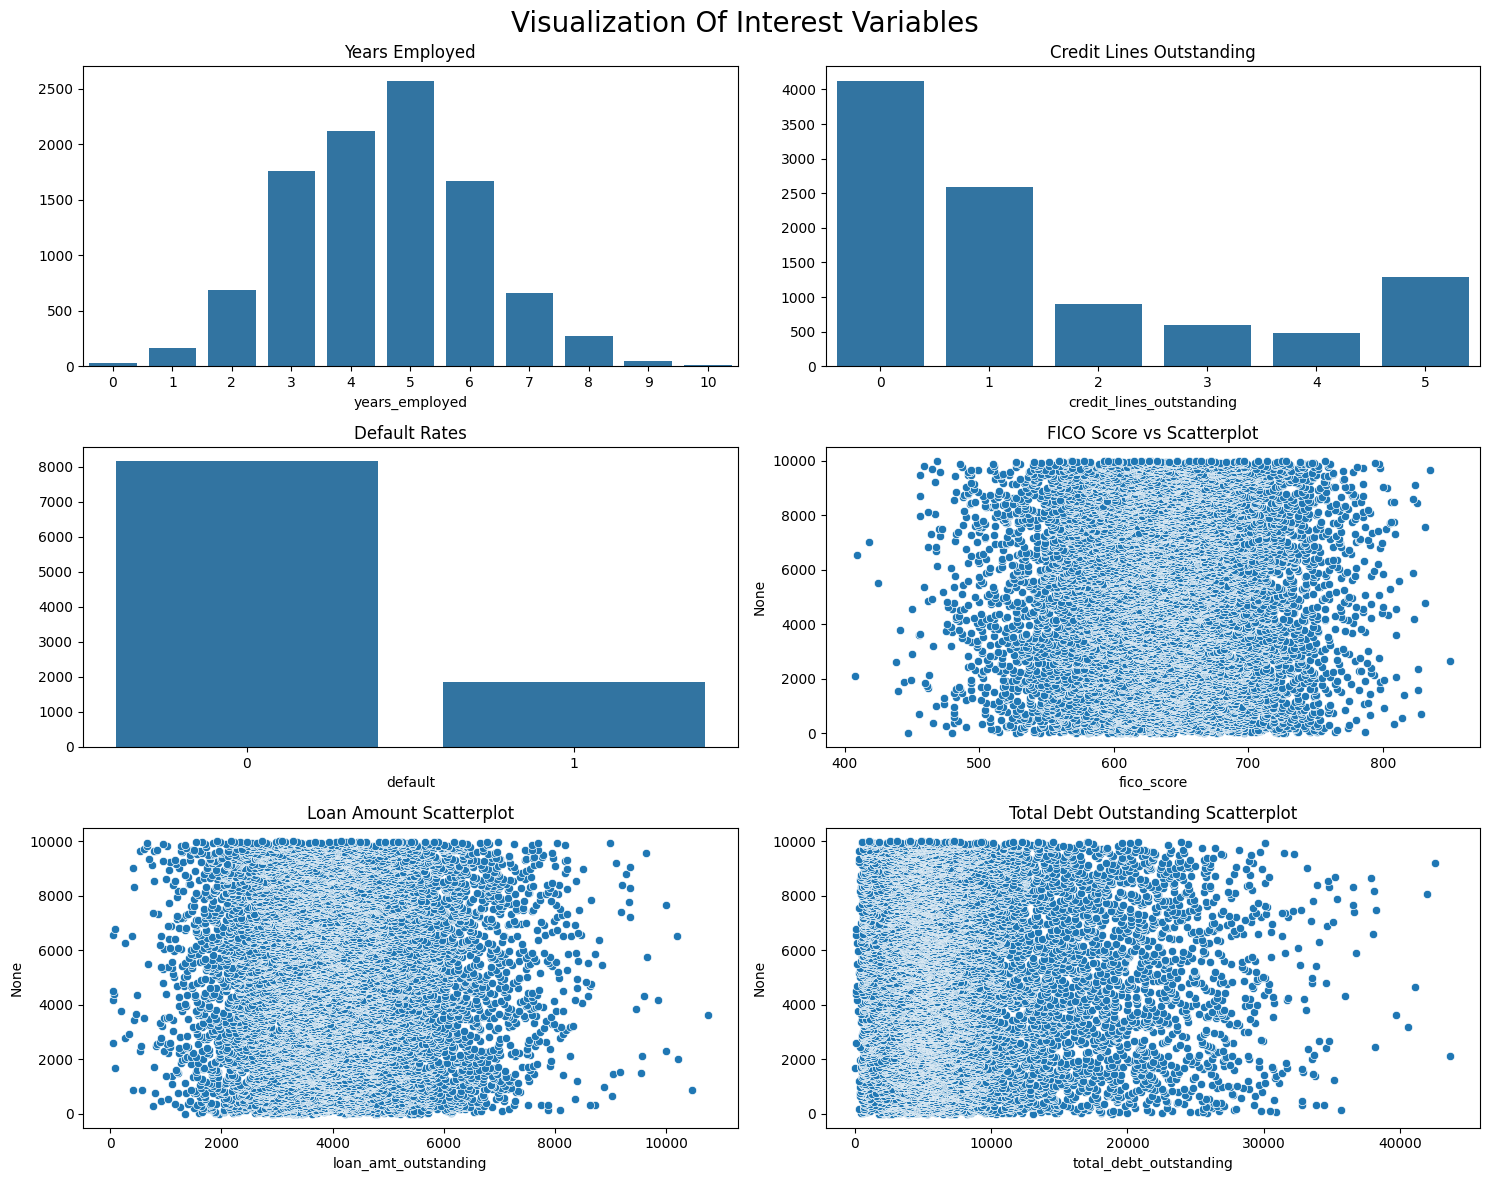

In [4]:
#Generating subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Visualization Of Interest Variables', fontsize=20)

#Generating visualizations
sns.barplot(x=df['years_employed'].value_counts().index, y=df['years_employed'].value_counts().values, ax=ax[0,0])
sns.barplot(x=df['credit_lines_outstanding'].value_counts().index, y=df['credit_lines_outstanding'].value_counts().values, ax=ax[0,1])
sns.barplot(x=df['default'].value_counts().index, y=df['default'].value_counts().values, ax=ax[1,0])
sns.scatterplot(x=df['fico_score'], y=df.index, ax=ax[1,1])
sns.scatterplot(x=df['loan_amt_outstanding'], y=df.index, ax=ax[2,0])
sns.scatterplot(x=df['total_debt_outstanding'], y=df.index, ax=ax[2,1])

#Labelling visualizations
ax[0,0].set_title('Years Employed')
ax[0,1].set_title('Credit Lines Outstanding')
ax[1,0].set_title('Default Rates')
ax[1,1].set_title('FICO Score vs Scatterplot')
ax[2,0].set_title('Loan Amount Scatterplot')
ax[2,1].set_title('Total Debt Outstanding Scatterplot')
plt.tight_layout()
plt.show()


### MODEL PREP

In [5]:
# Defining X and y variables
y = df["default"]
X = df.drop(columns=["customer_id", "default"])

# Defining training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Displaying data split
pd.DataFrame(data={"Dimensions": [X_train.shape, 
                                  y_train.size, 
                                  X_test.shape, 
                                  y_test.size]},
             index=["X Train", "Y Train", "X Test", "Y Test"])

,Dimensions
X Train,"(9000, 6)"
Y Train,9000
X Test,"(1000, 6)"
Y Test,1000


### INITIALIZING MODEL

In [6]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [7]:
# Evaluate the model and represent the results in percentages
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score (%)': [
        round(accuracy_score(y_test, y_pred) * 100, 0),
        round(precision_score(y_test, y_pred) * 100, 0),
        round(recall_score(y_test, y_pred) * 100, 0),
        round(f1_score(y_test, y_pred) * 100, 0)]})

#Previewing results
results

,Metric,Score (%)
0,Accuracy,99.0
1,Precision,96.0
2,Recall,98.0
3,F1 Score,97.0


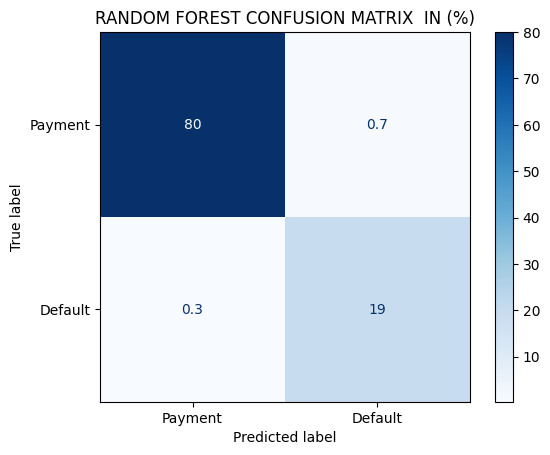

In [8]:
#Displaying confusion matrix
ConfusionMatrixDisplay(confusion_matrix=
                       confusion_matrix(y_test, y_pred, normalize="all")*100,
                       display_labels = ['Payment','Default']).plot(cmap='Blues')
plt.title('RANDOM FOREST CONFUSION MATRIX  IN (%)')
plt.show()

### LOSS PREDICTOR

In [9]:
#Prediction logic
def predict_expected_loss(credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'credit_lines_outstanding': [credit_lines_outstanding],
        'loan_amt_outstanding': [loan_amt_outstanding],
        'total_debt_outstanding': [total_debt_outstanding],
        'income': [income],
        'years_employed': [years_employed],
        'fico_score': [fico_score]
    })
    
    # Predict the probability of default
    prob_default = rf_classifier.predict_proba(input_data)[0][1]
    
    # Calculate the expected loss
    expected_loss = loan_amt_outstanding * prob_default
    
    print(f"Expected Loss: ${expected_loss:.2f}")

### LOAN DEFAULT PREDICTOR

In [10]:
#INPUT ORDER 
# credit_lines_outstanding, loan_amt_outstanding, total_debt_outstanding, income, years_employed, fico_score
predict_expected_loss(1, 5000, 3000, 60000, 5, 650)

Expected Loss: $0.00
